Sources cited:

In [9]:
# import libraries
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
import math

factors = pd.read_excel(r'/Users/peterfeng/Downloads/积累/Previous Courses Materials/UChicago Past Courses/UChicago 2021 Fall/Portfolio Theory/hw data/dfa_analysis_data.xlsx',sheet_name=1,index_col='Date',parse_dates=['Date'])
factors.drop('RF',axis=1,inplace=True)
total_returns = pd.read_excel(r'/Users/peterfeng/Downloads/积累/Previous Courses Materials/UChicago Past Courses/UChicago 2021 Fall/Portfolio Theory/hw data/dfa_analysis_data.xlsx',sheet_name=2,index_col='Date',parse_dates=['Date'])
factors

,Mkt-RF,SMB,HML
Date,,,
1926-07-31,0.0296,-0.0238,-0.0273
1926-08-31,0.0264,-0.0147,0.0414
1926-09-30,0.0036,-0.0139,0.0012
1926-10-31,-0.0324,-0.0013,0.0065
1926-11-30,0.0253,-0.0016,-0.0038
...,...,...,...
2021-04-30,0.0493,-0.0311,-0.0093
2021-05-31,0.0029,-0.0028,0.0704
2021-06-30,0.0279,0.0180,-0.0776


# 2 The Factors


DFA believes certain stocks have higher expected excess returns. In addition to the overall market
equity premium, DFA believes that there is a premium attached to a “size” and “value” factor. Note
that these three factors are already listed as excess returns.1
Use the data found in ‘dfa analysis data.xlsx

• FACTORS: Monthly excess return data for the overall equity market, ˜r
m. The sheet also
contains data on two additional factors, SMB and HML, as well as the risk-free rate. You do
not need any of these columns for the homework. Just use the MKT column, which is excess
market returns. (So no need to subtract the risk-free rate.)


1. The Factors. Calculate their univariate performance statistics:

• mean

• volatility

• Sharpe

• VaR(.05)

Report these for the following three subsamples:

• Beginning - 1980

• 1981 - 2001

• 2002 - End

In [11]:
stats = pd.DataFrame()
stats['Mean -1980'] = factors.loc[:'1980'].mean() *12
stats['Vol -1980'] = factors.loc[:'1980'].std() *math.sqrt(12)
stats['Sharpe -1980'] = stats['Mean -1980'] / stats['Vol -1980']
stats['VaR -1980'] = factors.loc[:'1980'].quantile(0.05) *math.sqrt(12)

stats['Mean 1981-2001'] = factors.loc['1981':'2001'].mean() *12
stats['Vol 1981-2001'] = factors.loc['1981':'2001'].std() *math.sqrt(12)
stats['Sharpe 1981-2001'] = stats['Mean 1981-2001'] / stats['Vol 1981-2001']
stats['VaR 1981-2001'] = factors.loc['1981':'2001'].quantile(0.05)  *math.sqrt(12)

stats['Mean 2002-End'] = factors.loc['2002':].mean() *12

stats['Vol 2002-End'] = factors.loc['2002':].std() *math.sqrt(12)
stats['Sharpe 2002-End'] = stats['Mean 2002-End'] / stats['Vol 2002-End']
stats['VaR 2002-End'] = factors.loc['2002':].quantile(0.05)  *math.sqrt(12)
stats

,Mean -1980,Vol -1980,Sharpe -1980,VaR -1980,Mean 1981-2001,Vol 1981-2001,Sharpe 1981-2001,VaR 1981-2001,Mean 2002-End,Vol 2002-End,Sharpe 2002-End,VaR 2002-End
Mkt-RF,0.081138,0.205050,0.395696,-0.290933,0.077257,0.157393,0.490856,-0.223590,0.094714,0.150853,0.627852,-0.267602
SMB,0.033976,0.114605,0.296464,-0.150463,-0.000543,0.118475,-0.004582,-0.161133,0.023832,0.085545,0.278592,-0.129557
HML,0.049134,0.133821,0.367162,-0.148645,0.063552,0.111248,0.571268,-0.144799,-0.011715,0.097530,-0.120120,-0.138477


2. Based on the factor statistics above, answer the following.

(a) Does each factor have a premium (positive expected excess return) in each subsample?

Mkt-RF has a positive expected excess return in each subsample. SMB has a positive expected excess return for beginning-1980 and 2002-End, but not during the 1981-2001 period. HML has positive expected excess returns for the two earlier periods, but not the last one.

(b) Does the premium to the size factor get smaller after 1980?

For the 1981-2001 and 2002-End periods, the expected excess return is lower than it was in Beginning-1980

(c) Does the premium to the value factor get smaller during the 1990’s?


In [12]:
factors.loc['1990':'1999'].mean() *12

Mkt-RF    0.12764
SMB      -0.01375
HML      -0.00108
dtype: float64

Yes, the excess returns on HML became negative during the 1990s, whereas it was previously positive.

(d) How have the factors performed since the time of the case, (2002-present)?

SMB and HML have gotten closer to 0, suggesting that the market is now pricing these factors into the pricing, where it wasn't previously. The regular market returns still performs very strongly.

3. The factors are constructed in such a way as to reduce correlation between them.
Report the correlation matrix across the three factors. Does the construction method succeed
in keeping correlations small? Does it achieve this in each subsample?

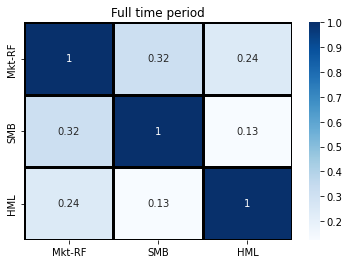

In [13]:
# full time period
overall_correlation = factors.corr()
overall_correlation
sns.heatmap(factors.corr(),annot=True,cmap='Blues',linewidths=3,linecolor='black')
plt.title('Full time period')
plt.show()


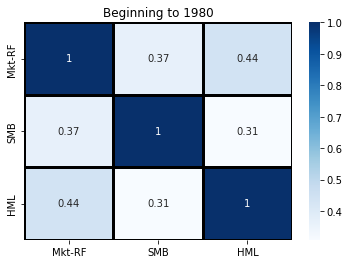

In [14]:
# Beginning - 1980
sns.heatmap(factors.loc[:'1980'].corr(),annot=True,cmap='Blues',linewidths=3,linecolor='black')
plt.title('Beginning to 1980')
plt.show()

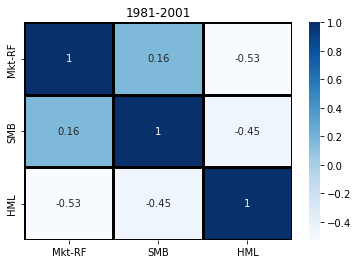

In [15]:
# 1981-2001
sns.heatmap(factors.loc['1981':'2001'].corr(),annot=True,cmap='Blues',linewidths=3,linecolor='black')
plt.title('1981-2001')
plt.show()

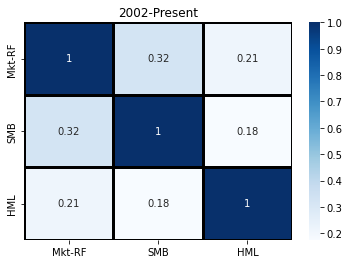

In [16]:
# 2002-End
sns.heatmap(factors.loc['2002':].corr(),annot=True,cmap='Blues',linewidths=3,linecolor='black')
plt.title('2002-Present')
plt.show()

In the 1981-2001 period, the Mkt-RF and the HML had relatively strong correlation of -0.53. HML also had a correlation of -0.45 with SMB.

In the Beginning to 1980 period, all the factors had mild correlation with each other.

In the overall and latest periods, the correlation levels have been lower in magnitude.

4. Plot the cumulative returns of the three factors. Create plots for the 1981-2001 subsample as
well as the 2002-Present subsample.

Text(0, 0.5, 'Cumulative return')

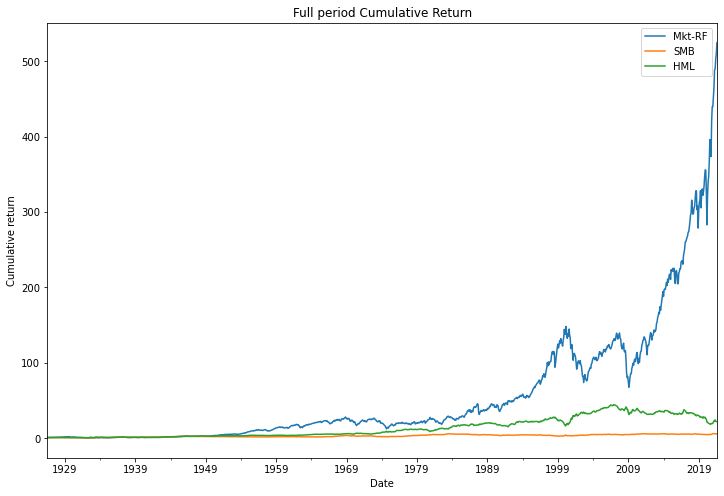

In [17]:
cum_returns = (factors + 1).cumprod()
cum_returns.plot(figsize=(12,8))
plt.title('Full period Cumulative Return')
plt.ylabel('Cumulative return')

Text(0, 0.5, 'Cumulative return')

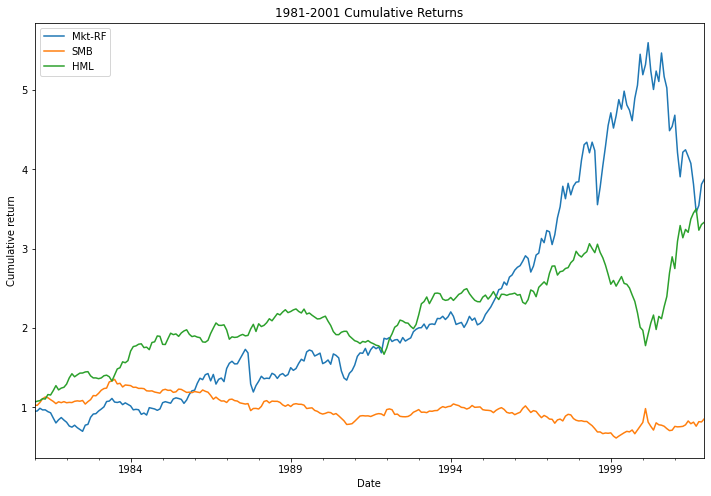

In [18]:
cum_returns_1981_2001 = (factors.loc['1981':'2001'] + 1).cumprod()
cum_returns_1981_2001.plot(figsize=(12,8))
plt.title('1981-2001 Cumulative Returns')
plt.ylabel('Cumulative return')

Text(0, 0.5, 'Cumulative return')

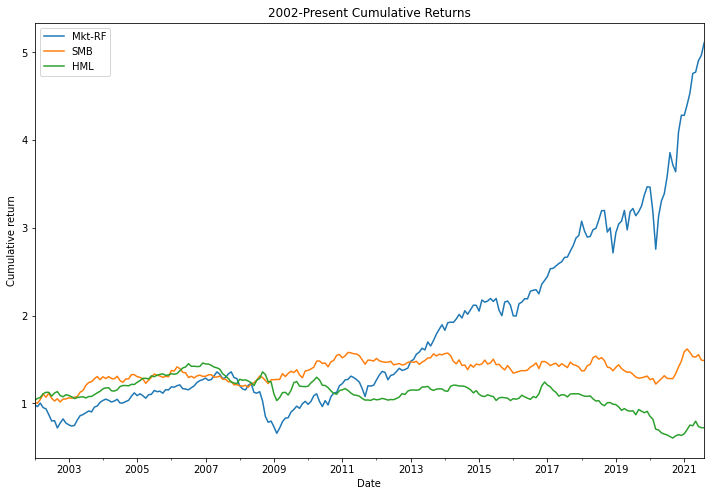

In [19]:
cum_returns_2002_end = (factors.loc['2002':] + 1).cumprod()
cum_returns_2002_end.plot(figsize=(12,8))
plt.title('2002-Present Cumulative Returns')
plt.ylabel('Cumulative return')

5. Does it appear that all three factors were valuable in 1981-2001? And post-2001? Would you
advise DFA to continue emphasizing all three factors?


SMB was not valuable in the 1981-2001 period. HML underperformed post-2001. Market continues to remain strong except for brief periods of financial crisises. In later years, the other factors have become increasingly less valuable compared to the overall market, so they should likely be emphasized less.

# 3 CAPM

DFA believes that premia in stocks and stock portfolios is related to the three factors.
Let’s test 25 equity portfolios that span a wide range of size and value measures.2
• PORTFOLIOS: Monthly total return data on 25 equity portfolios sorted by their size-value
characteristics. Denote these as r
i
, for n = 1, . . . , 25.
• Note that while the factors were given as excess returns, the portfolios are total returns.
• For this entire problem, focus on the 1981-Present subsample.

1. Summary Statistics. For each portfolio,
• Use the Risk-Free rate column in the factors tab to convert these total returns to excess
returns.
• Calculate the (annualized) univariate statistics from 1.1.
• Can the difference in mean excess returns of the portfolios be explained by differences in
their volatilities? Or by their VaR(.05) statistics?

In [24]:
rf = pd.read_excel(r'/Users/peterfeng/Downloads/积累/Previous Courses Materials/UChicago Past Courses/UChicago 2021 Fall/Portfolio Theory/hw data/dfa_analysis_data.xlsx',sheet_name=1,index_col='Date',parse_dates=['Date'])
rf = rf[['RF']]
rf
stock_returns = pd.read_excel(r'/Users/peterfeng/Downloads/积累/Previous Courses Materials/UChicago Past Courses/UChicago 2021 Fall/Portfolio Theory/hw data/dfa_analysis_data.xlsx',sheet_name=2,index_col='Date',parse_dates=['Date'])
stock_returns['rf'] = rf
for column in stock_returns.columns:
    stock_returns[column] = stock_returns[column] - stock_returns['rf']
stock_returns.drop('rf',axis=1,inplace=True)
stock_returns

,SMALL LoBM,ME1 BM2,ME1 BM3,ME1 BM4,SMALL HiBM,ME2 BM1,ME2 BM2,ME2 BM3,ME2 BM4,ME2 BM5,...,ME4 BM1,ME4 BM2,ME4 BM3,ME4 BM4,ME4 BM5,BIG LoBM,ME5 BM2,ME5 BM3,ME5 BM4,BIG HiBM
Date,,,,,,,,,,,,,,,,,,,,,
1926-07-31,0.035582,-0.006319,-0.021634,0.001330,0.018334,0.009877,0.021992,0.002726,-0.028249,-0.005544,...,0.013693,0.013078,0.012333,0.000527,0.022478,0.032339,0.058702,0.017393,0.028911,0.003423
1926-08-31,-0.024574,-0.089775,0.021904,0.003586,0.081468,0.021118,-0.014349,0.037584,0.002538,0.059175,...,0.010836,0.036230,0.015967,0.019206,0.050922,0.007624,0.039403,0.017962,0.052349,0.075076
1926-09-30,-0.064413,-0.005289,-0.064282,-0.018668,0.006349,-0.028840,-0.014918,0.008529,-0.037780,-0.011701,...,0.008623,-0.007550,-0.017221,0.012346,0.006430,-0.015206,0.034238,-0.002100,-0.009787,-0.026584
1926-10-31,-0.089441,-0.040732,-0.059919,0.053970,-0.028676,-0.031269,-0.035863,-0.053945,-0.083391,-0.016413,...,-0.036561,-0.029759,-0.022369,-0.034251,-0.056725,-0.030613,-0.033271,-0.025849,-0.049919,-0.061329
1926-11-30,0.031644,0.063376,0.019534,-0.050120,0.002262,0.027933,-0.026790,0.026978,0.048446,0.024192,...,0.031348,0.020787,0.036030,0.046220,0.015113,0.039846,0.022226,0.012017,0.033519,0.022536
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-04-30,-0.031918,-0.025146,0.016436,0.010073,-0.009711,0.035662,0.016463,0.022390,0.007952,0.012227,...,0.043807,0.031023,0.059322,0.033530,0.060459,0.058966,0.058241,0.039870,0.047821,0.045701
2021-05-31,0.014358,0.005285,0.007486,0.023463,0.104483,-0.024340,0.001611,0.005692,0.026063,0.073152,...,-0.019889,0.000367,0.021225,0.037037,0.044815,-0.013830,0.007609,0.033797,0.036626,0.080384
2021-06-30,0.086902,0.051847,0.010202,-0.004778,0.037169,0.066363,0.035228,0.013767,-0.020188,0.011213,...,0.051402,0.002436,-0.010576,-0.038628,-0.046390,0.057328,0.014829,-0.022818,-0.023452,-0.037225


In [25]:
stock_stats = pd.DataFrame()
stock_stats['Mean'] = stock_returns.loc['1981':].mean() *12
stock_stats['Vol'] = stock_returns.loc['1981':].std() *math.sqrt(12)
stock_stats['Sharpe'] = stock_stats['Mean'] / stock_stats['Vol']
stock_stats['VaR'] = stock_returns.loc['1981':].quantile(0.05) *math.sqrt(12)
stock_stats

,Mean,Vol,Sharpe,VaR
SMALL LoBM,0.022153,0.270822,0.081798,-0.397348
ME1 BM2,0.106868,0.236815,0.451272,-0.325541
ME1 BM3,0.099837,0.197447,0.505641,-0.291346
ME1 BM4,0.124833,0.192335,0.649039,-0.267840
SMALL HiBM,0.134298,0.208090,0.645387,-0.304225
ME2 BM1,0.070202,0.243811,0.287936,-0.358867
ME2 BM2,0.109513,0.201793,0.542697,-0.281725
ME2 BM3,0.109943,0.182104,0.603739,-0.266167
ME2 BM4,0.110922,0.179685,0.617314,-0.269148
ME2 BM5,0.119810,0.212043,0.565026,-0.321392


Text(0, 0.5, 'Excess Return')

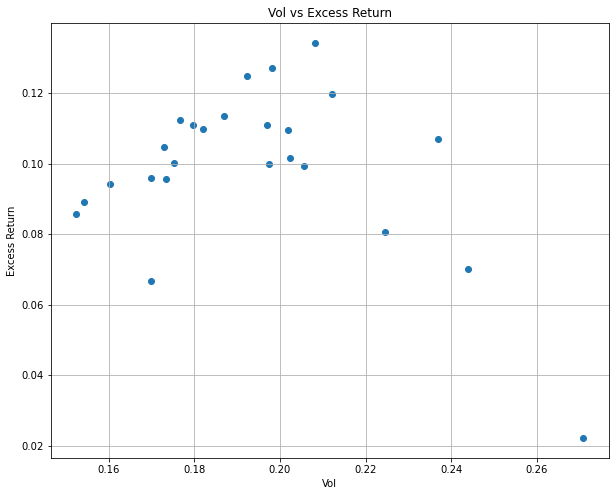

In [26]:
plt.figure(num=1,figsize=(10,8))
plt.title('Vol vs Excess Return')
plt.grid()
plt.scatter(stock_stats['Vol'],stock_stats['Mean'])
plt.xlabel('Vol')
plt.ylabel('Excess Return')

Text(0, 0.5, 'Excess Return')

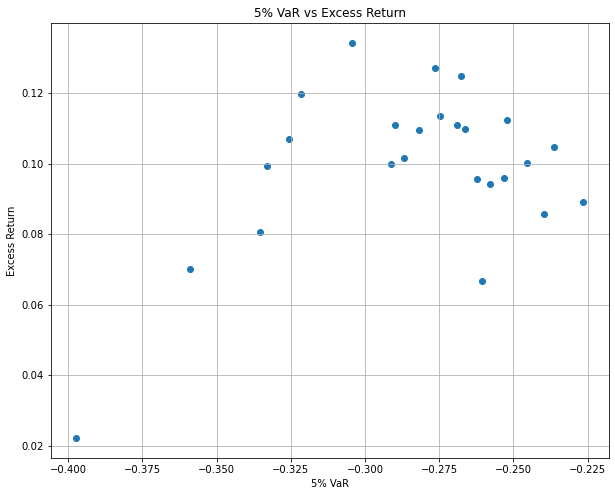

In [27]:
plt.figure(num=1,figsize=(10,8))
plt.grid()
plt.title('5% VaR vs Excess Return')
plt.scatter(stock_stats['VaR'],stock_stats['Mean'])
plt.xlabel('5% VaR')
plt.ylabel('Excess Return')

The volatilities and VaR values are not sufficient to explain the differences in mean excess return, as shown in the graphs. This supports DFA's notion that market exposure is not sufficient to explain returns, suggesting there are other factors involved, such as size and value.

## 2. CAPM

The Capital Asset Pricing Model (CAPM) asserts that an asset (or portfolio’s) expected excess
return is completely a function of its beta to the equity market index (SPY, or in this case,
MKT.)
Specifically, it asserts that, for any excess return, ˜r
i
, its mean is proportional to the mean excess
return of the market, ˜r
m, where the proporitonality is the regression beta of ˜r
i on ˜r
m.
E [˜r
i
t
] = β
i,m E [˜r
m
t
] (CAPM)
Let’s examine whether that seems plausible.

a) For each of the n = 25 test portfolios, run the CAPM time-series regression:
r˜
i
t = α
i + β
i,m r˜
m
t + 
i

So you are running 25 separate regressions, each using the T-sized sample of time-series
data.

In [28]:
alpha_beta_df = pd.DataFrame(columns=['Alpha','Beta'])

for stock in stock_returns.columns:
    X = sm.add_constant(factors.loc['1981':]['Mkt-RF'])
    Y = stock_returns.loc['1981':][stock]
    estimation = sm.OLS(Y,X,missing='drop').fit()
#     print(stock)
#     print(estimation.params)
    alpha_beta_df.loc[stock,'Alpha'] = estimation.params[0] * 12 # annualized
    alpha_beta_df.loc[stock,'Beta'] = estimation.params[1]
    
    
#     print(estimation.params)
    
alpha_beta_df

/Users/peterfeng/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


,Alpha,Beta
SMALL LoBM,-0.094864,1.365441
ME1 BM2,0.005837,1.178907
ME1 BM3,0.009985,1.04846
ME1 BM4,0.040945,0.978866
SMALL HiBM,0.04807,1.006173
ME2 BM1,-0.045439,1.34938
ME2 BM2,0.012732,1.1293
ME2 BM3,0.022396,1.021567
ME2 BM4,0.027336,0.975342
ME2 BM5,0.023373,1.125291


(b) Report the estimated β
i,m, Treynor Ratio, α
i
, and Information Ratio for each of the n
regressions.


In [30]:
reg_stats = pd.DataFrame()
for stock in stock_returns.columns:
    X = sm.add_constant(factors.loc['1981':]['Mkt-RF'])
    Y = stock_returns.loc['1981':][stock]
    estimation = sm.OLS(Y,X,missing='drop').fit()
    reg_stats.loc[stock,'Alpha'] = estimation.params['const'] * 12
    reg_stats.loc[stock, 'Market Beta'] = estimation.params['Mkt-RF']
    reg_stats.loc[stock, 'Treynor Ratio'] = (Y.mean() / estimation.params['Mkt-RF']) * 12
    reg_stats.loc[stock, 'Information Ratio'] = (estimation.params['const'] / estimation.resid.std()) * math.sqrt(12)
    
reg_stats

/Users/peterfeng/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


,Alpha,Market Beta,Treynor Ratio,Information Ratio
SMALL LoBM,-0.094864,1.365441,0.016224,-0.556537
ME1 BM2,0.005837,1.178907,0.090650,0.038430
ME1 BM3,0.009985,1.048460,0.095223,0.088010
ME1 BM4,0.040945,0.978866,0.127528,0.343227
SMALL HiBM,0.048070,1.006173,0.133474,0.346448
ME2 BM1,-0.045439,1.349380,0.052025,-0.357114
ME2 BM2,0.012732,1.129300,0.096974,0.124702
ME2 BM3,0.022396,1.021567,0.107622,0.244783
ME2 BM4,0.027336,0.975342,0.113726,0.277721
ME2 BM5,0.023373,1.125291,0.106470,0.191601


(c) If (CAPM) were true, what would be true of the Treynor Ratios, alphas, and Information
Ratios?

If CAPM were true, the alphas and the information ratios would all be zero. The Treynor Ratios would all equal to the mean excess market return.



## 3. Cross-sectional Estimation
Let’s test (CAPM) directly. We already have what we need:

• The dependent variable, (y): mean excess returns from each of the n = 25 portfolios.
• The regressor, (x): the market beta from each of the n = 25 time-series regressions.
Then we can estimate the following equation:

• The dependent variable, (y): mean excess returns from each of the n = 25 portfolios.
• The regressor, (x): the market beta from each of the n = 25 time-series regressions.
Then we can estimate the following equation:

(a) Report the R-squared of this regression.


In [54]:
returns_vector = stock_returns.loc['1981':].mean().to_frame() * 12 # annualized
beta_vector = reg_stats[['Market Beta']]
returns_vector
# beta_vector
X = sm.add_constant(beta_vector)
Y = returns_vector
meta_estimation = sm.OLS(Y,X,missing='drop').fit()
print(meta_estimation.summary())
print(meta_estimation.rsquared)


                            OLS Regression Results                            
Dep. Variable:                      0   R-squared:                       0.184
Model:                            OLS   Adj. R-squared:                  0.149
Method:                 Least Squares   F-statistic:                     5.186
Date:                Sat, 23 Oct 2021   Prob (F-statistic):             0.0324
Time:                        10:26:01   Log-Likelihood:                 62.010
No. Observations:                  25   AIC:                            -120.0
Df Residuals:                      23   BIC:                            -117.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.1820      0.037      4.987      

In [55]:
print(f'R^2 value is {meta_estimation.rsquared}')

R^2 value is 0.18398308768846872


(b) Report the intercept, η.

In [58]:
print(f'Annualized intercept value is {meta_estimation.params[0]}')

Annualized intercept value is 0.18202014149932097


η = 0.1820 (annualized)

(c) Report the regression coefficient, λm.


In [59]:
print(f'Annualized regression coefficient value is {meta_estimation.params[1]}')

Annualized regression coefficient value is -0.07751393842321821


 λm = -0.0775 (annualized)

What would these three statistics be if (CAPM) were true?

CAPM says the market beta is the only risk associated with higher average returns, so if it is true, the r-squared would be 100%, the intercept would be 0.

4. Broadly speaking, do these results support DFA’s belief in size and value portfolios containing
premia unrelated to the CAPM?


The answer can be yes and no. Our results support DFA's view that risks beyond market beta matter, but there's no enough evidence to show that size and value factors matter.

